In [1]:
import math 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set()
plt.style.use("ggplot")


In [3]:
# Loading dataframe
outbreaks = pd.read_excel(open('FoodData.xlsx','rb'), sheetname=0)
#General information about the dataframe
outbreaks.info()

/Users/haruto/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 12 columns):
Year                       19986 non-null int64
Month                      19986 non-null int64
State                      19986 non-null object
Genus Species              13196 non-null object
Serotype or Genotype       4216 non-null object
Etiology Status            13196 non-null object
Location of Preparation    18833 non-null object
Illnesses                  19986 non-null int64
Hospitalizations           16340 non-null float64
Deaths                     16374 non-null float64
Food Vehicle               10500 non-null object
Contaminated Ingredient    2012 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [4]:
outbreaks.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN


In [5]:
outbreaks.Illnesses= outbreaks.Illnesses.astype('float64')
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 12 columns):
Year                       19986 non-null int64
Month                      19986 non-null int64
State                      19986 non-null object
Genus Species              13196 non-null object
Serotype or Genotype       4216 non-null object
Etiology Status            13196 non-null object
Location of Preparation    18833 non-null object
Illnesses                  19986 non-null float64
Hospitalizations           16340 non-null float64
Deaths                     16374 non-null float64
Food Vehicle               10500 non-null object
Contaminated Ingredient    2012 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 1.8+ MB


In [6]:
# Renaming columns
outbreaks.columns = ['Year', 'Month', 'State', 'Species', 'Serotype/Genotype',
       'Status', 'Location', 'Illnesses',
       'Hospitalizations', 'Fatalities', 'Food',
       'Ingredient']

In [7]:
outbreaks.head()

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN


In the column Month, each entry  has  a number between  1 and 12. Let us map these numbers  to the name of the months.


In [8]:
#Renaming column Month to strings 
outbreaks["Month"] =outbreaks.Month.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
                          7:'July', 8:'August', 9:'September', \
 10:'October', 11:'November', 12:'December'})


In [9]:
outbreaks.head()

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,January,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,January,Minnesota,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,January,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,January,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,January,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN


Let's substitute the names of the states to their abbreviations.

In [10]:
# States to abbreviations
s_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Washington DC' : "DC",
    'Guam':'GU',
    'Puerto Rico' : "PR",
    'Republic of Palau' : "PW",
    'Multistate': "MUL_STATE"
};
# Map State_name to its abbreviation
State_to_Abbrev = lambda state: s_state_abbrev[state] 

state_abrev= outbreaks["State"].apply(State_to_Abbrev)
outbreaks["State"]  = state_abrev

In [11]:
outbreaks.head()

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,January,MN,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,January,MN,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,January,MN,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,January,MN,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,January,MN,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN


Let us explore the null values for  each column.

In [12]:
# Sorted list of null values
null_values= outbreaks.isnull().sum().sort_values(axis=0, ascending=True)
# Percent of not null values by column
percent_null_values= 100.0*null_values/outbreaks.shape[0]
percent_not_null_values = 100.0- percent_null_values
print("Not null values by column")
print("")
percent_not_null_values

Not null values by column



Year                 100.000000
Month                100.000000
State                100.000000
Illnesses            100.000000
Location              94.230962
Fatalities            81.927349
Hospitalizations      81.757230
Species               66.026218
Status                66.026218
Food                  52.536776
Serotype/Genotype     21.094766
Ingredient            10.067047
dtype: float64

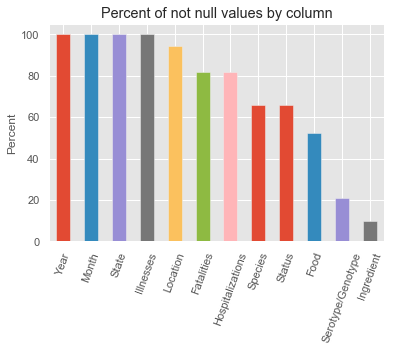

In [13]:
# Plot of not null values by column
percent_not_null_values.plot(kind="bar",rot=70)
plt.title("Percent of not null values by column")
plt.ylabel("Percent")
#plt.xlabel("Column")
plt.show()

Removing columns with many null values($\approx 50 \%$ or more )

In [14]:
# Removing columns: Serotype/Genotype and Ingredient
# Also, let us remove column Status 

outbreaks= outbreaks[['Year', 'Month', 'State', 'Species',
       'Location', "Food",'Illnesses', 'Hospitalizations', 'Fatalities']]

Let's search for hidden white spaces in the categorical columns. When we do a search for a substring in an entry if this  entry is NaN Python give us  an error. To avoid that let us impute a value of type string to the NaN entries. 

In [15]:
str_columns = ['Species', 'Location', 'Food']
for column in str_columns:
        outbreaks_column= outbreaks[column].fillna("null_value",inplace= False)
        del outbreaks[column]
        outbreaks[column] = outbreaks_column
 

Hidden white spaces.

In [16]:
       
import re

def leading_spaces(column):# Looking for leading spaces
    begin_spaces=lambda str: True  if re.search(r'^\s', str) else False
    return (outbreaks[column].apply(begin_spaces)).sum()



for column in str_columns:
    #Trailing
    print("Number of observations with Leading spaces in column {}: {}".format(column,leading_spaces(column)) )

print("") 
    
def trailing_spaces(column):# Looking for trailing spaces
    trailing_spaces=lambda str: True  if re.search(r'\s$', str) else False
    return (outbreaks[column].apply(trailing_spaces)).sum()


for column in str_columns:
    #Trailing
    print("Number of observations with trailing spaces in column {}: {}".format(column,trailing_spaces(column)) )

Number of observations with Leading spaces in column Species: 0
Number of observations with Leading spaces in column Location: 0
Number of observations with Leading spaces in column Food: 0

Number of observations with trailing spaces in column Species: 0
Number of observations with trailing spaces in column Location: 0
Number of observations with trailing spaces in column Food: 1


We have an extra trailing space in Food.

In [17]:
remove_trailing = lambda word: word.strip()
outbreaks["Food"] = outbreaks["Food"].apply(remove_trailing)
print("Number of observations with trailing spaces in Food: {}"\
      .format(trailing_spaces("Food") )) 

Number of observations with trailing spaces in Food: 0


Looking for spaces around the semicolons.

In [18]:
# Any space before of after the ;
for column in str_columns:
    print("For {}, do all semicolons contain an space after? {}".format(column,(outbreaks[column].str.contains(";")).sum() \
    ==(outbreaks[column].str.contains("; ")).sum()))
print("")
for column in str_columns:
    print("For {}, number of observations that  contain an space before ; {}"\
          .format(column,(outbreaks[column].str.contains(" ;")).sum()))
    print("For {}, number of observations that  contain an space before ; {}"\
          .format(column,(outbreaks[column].str.contains(" ;")).sum()))

For Species, do all semicolons contain an space after? True
For Location, do all semicolons contain an space after? True
For Food, do all semicolons contain an space after? True

For Species, number of observations that  contain an space before ; 0
For Species, number of observations that  contain an space before ; 0
For Location, number of observations that  contain an space before ; 0
For Location, number of observations that  contain an space before ; 0
For Food, number of observations that  contain an space before ; 0
For Food, number of observations that  contain an space before ; 0


In columns such as Location, Species and Food, there are records with multiple entries.  It can happen that two records contain the same elements but arranged in a different way. To avoid counting these records as different let us sort each record.

In [19]:
dataframe = None
dataframe= outbreaks.copy()
def homogeneous(data,column): 
    df = data.copy()
    str_column=df[column].str.lower().str.strip().str.replace("; ",";")
    sort_list = lambda element: sorted(element) # sort
    lst_column= str_column.str.split(";").apply(sort_list)# each entry is a list
    return str_column, lst_column



How many different labels do we have in each categorical column?

In [20]:

def unique_labels(data,column):
    df = data.copy()
    df[column + "_list"]= homogeneous(df,column)[1]
    #df["Is_There_Hosp"]=(df.Hospitalizations > 0.0).astype("float")
    temp_df = df[[column + "_list"]]
    
    set_values = []
    for entry in temp_df[column + "_list"]:
        for element in entry:
            set_values.append(element)
    unique= list(set(set_values))
    return np.array(unique,dtype= "O")



unique_labels(dataframe,"Location")

array(['hotel/motel',
       'banquet facility (food prepared and served on-site)',
       'office/indoor workplace', 'hospital',
       'restaurant - sit-down dining',
       'caterer (food prepared off-site from where served)',
       'child day care', 'restaurant - other or unknown type',
       'private home/residence', 'long-term care/nursing home/as...',
       'prison/jail', 'grocery store',
       'long-term care/nursing home/assisted living facility',
       'restaurant - buffet',
       'restaurant - "fast-food"(drive up service or pay at counter)',
       'ship/boat', 'null_value', 'unknown', 'religious facility',
       'farm/dairy', 'camp', 'school/college/university',
       'fair, festival, other temp or mobile services', 'other'],
      dtype=object)

Here we have: two locations named: long-term care/nursing home/assisted living facility' and long-term care/nursing home/as...', but they are the same place. 

In [21]:
pd.set_option("display.max_colwidth", 10000)
loc_formated = None
loc= homogeneous(dataframe,"Location")[0]
loc_formated=loc.replace('long-term care/nursing home/as...','flag_mark',regex=True,inplace= False)

loc_formated_flag=loc_formated.replace('ted living facility','',regex=True,inplace= False)
loc_back=loc_formated_flag.replace('flag_mark','long-term care',regex=True,inplace= False)


dataframe.loc[:,"Location"]= loc_back;

In [22]:
# Final result 
unique_labels(dataframe,"Location")

array(['hotel/motel',
       'banquet facility (food prepared and served on-site)',
       'fair, festival, other temp or mobile services',
       'office/indoor workplace', 'hospital',
       'restaurant - sit-down dining',
       'caterer (food prepared off-site from where served)',
       'child day care', 'restaurant - other or unknown type',
       'private home/residence', 'prison/jail', 'grocery store',
       'restaurant - "fast-food"(drive up service or pay at counter)',
       'ship/boat', 'null_value', 'unknown', 'religious facility',
       'farm/dairy', 'camp', 'school/college/university',
       'restaurant - buffet', 'long-term care', 'other'], dtype=object)

Putting column Location in a more readable format.

In [23]:
dict_contain = {"caterer":"caterer","fast-food": "rest-fast-food",
               "banquet":"banquet","sit-down":"rest-sit-down",
                "other or unknown":"rest-other or unknown", "fair": "fair or mobile" }

In [24]:
# From the original location to a more readable format.
def replacement(element):
    for index,entry in enumerate(element):
        for key in dict_contain:
            if key in entry:
                element[index]=dict_contain[key] 
       
    return element

In [25]:
pd.set_option("display.max_colwidth", 100)
outbreaks.loc[:,"Location"]=homogeneous(dataframe,"Location")[1].apply(replacement).apply(lambda x: "; ".join(x))

In [26]:
#homogeneous(dataframe,"Species")[0]
unique_labels(dataframe,"Species")    
                       

array(['cryptosporidium', 'shigella sonnei', 'trichinella unknown',
       'cyclospora', 'adenovirus', 'vibrio cholerae', 'other - virus',
       'norovirus genogroup iv', 'astrovirus', 'listeria unknown',
       'staphylococcus unknown', 'yersinia enterocolitica', 'ciguatoxin',
       'pesticides', 'cleaning agents', 'staphylococcus other',
       'escherichia coli, enterotoxigenic', 'campylobacter coli',
       'norovirus genogroup i', 'sapovirus', 'campylobacter fetus',
       'escherichia coli, enteroaggregative', 'null_value', 'trichinella',
       'scombroid toxin', 'bacillus other', 'norovirus genogroup ii',
       'streptococcus group a', 'enterococcus faecalis',
       'cyclospora cayetanensis', 'clostridium other',
       'other - chemical/toxin', 'mycotoxins', 'salmonella', 'anisakis',
       'shigella flexneri', 'enterobacter other', 'yersinia',
       'plant/herbal toxins', 'clostridium perfringens',
       'escherichia coli, shiga toxin-producing', 'heavy metals',
       

In [27]:
outbreaks.loc[:,"Species"] = homogeneous(dataframe,'Species')[1].apply(lambda x: "; ".join(x))

In [28]:
outbreaks.head()

,Year,Month,State,Illnesses,Hospitalizations,Fatalities,Species,Location,Food
0,2009,January,MN,2.0,0.0,0.0,norovirus,rest-sit-down,null_value
1,2009,January,MN,16.0,0.0,0.0,norovirus,null_value,null_value
2,2009,January,MN,5.0,0.0,0.0,norovirus,rest-sit-down,null_value
3,2009,January,MN,3.0,0.0,0.0,norovirus,rest-fast-food,null_value
4,2009,January,MN,21.0,0.0,0.0,norovirus,rest-other or unknown,cookies


In [29]:
for column in str_columns:
    outbreaks.loc[:,column] = outbreaks[column].apply(lambda entry: np.nan if entry =="null_value" else entry)
    
    
outbreaks.head()

,Year,Month,State,Illnesses,Hospitalizations,Fatalities,Species,Location,Food
0,2009,January,MN,2.0,0.0,0.0,norovirus,rest-sit-down,NaN
1,2009,January,MN,16.0,0.0,0.0,norovirus,NaN,NaN
2,2009,January,MN,5.0,0.0,0.0,norovirus,rest-sit-down,NaN
3,2009,January,MN,3.0,0.0,0.0,norovirus,rest-fast-food,NaN
4,2009,January,MN,21.0,0.0,0.0,norovirus,rest-other or unknown,cookies


In [30]:
# Removing Palau
outbreaks= outbreaks.loc[outbreaks.State!="PW",:]
outbreaks= outbreaks.reset_index()
del outbreaks["index"]

In [38]:
raw_outbreaks = outbreaks.copy() # backup
raw_outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Data columns (total 9 columns):
Year                19984 non-null int64
Month               19984 non-null object
State               19984 non-null object
Illnesses           19984 non-null float64
Hospitalizations    16338 non-null float64
Fatalities          16372 non-null float64
Species             13195 non-null object
Location            18831 non-null object
Food                10499 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


To treat the null values we work with each feature separately. To each null entry we  assign a random value from the set of all possible not null values of the column.

In [39]:
def fill_nulls(data,rand_values,column):
        dataframe = data.copy()
        new_column= dataframe[column].fillna(value=rand_values,inplace= False)
        return new_column
    

In [40]:
# Filling null values for each column 
for column in outbreaks.columns:
    if outbreaks[column].isnull().sum()> 0.0:
        not_null= outbreaks[~outbreaks[column].isnull()][column]
        rand_values_array= np.random.choice(not_null,size=outbreaks[column].shape[0])
        rand_values_column=pd.Series(rand_values_array)
        outbreaks.loc[:,column]= fill_nulls(outbreaks,rand_values_column,column)
    
    

In [42]:
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Data columns (total 9 columns):
Year                19984 non-null int64
Month               19984 non-null object
State               19984 non-null object
Illnesses           19984 non-null float64
Hospitalizations    19984 non-null float64
Fatalities          19984 non-null float64
Species             19984 non-null object
Location            19984 non-null object
Food                19984 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


In [43]:
# One hot encoding for unique labels of the categorical columns
def col_to_vector(data,column):
    dataframe= data.copy()
    column_labels= unique_labels(dataframe,column)
    column_list_format=dataframe[column].str.split("; ")
    array_hot= []
    for values in column_list_format:
        col_vector= np.zeros(column_labels.shape[0])
        for index,label in enumerate(column_labels):
            for value in values:
                if value == label:
                    col_vector[index]+=1
        array_hot.append(col_vector)
    return column_labels, np.array(array_hot)            

In [44]:
vector_species=col_to_vector(outbreaks,"Species")[1]
vector_location=col_to_vector(outbreaks,"Location")[1]
df_vector_species = pd.DataFrame(vector_species,columns=col_to_vector(outbreaks,"Species")[0])
#df_vector_species
df_vector_location = pd.DataFrame(vector_species,columns=col_to_vector(outbreaks,"Species")[0])
df_vector_location= pd.DataFrame(vector_location,columns=col_to_vector(outbreaks,"Location")[0])
df_vector_location.head()

,hotel/motel,office/indoor workplace,hospital,rest-fast-food,fair or mobile,child day care,private home/residence,prison/jail,grocery store,ship/boat,...,religious facility,farm/dairy,camp,school/college/university,caterer,restaurant - buffet,rest-sit-down,rest-other or unknown,long-term care,other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
#normed_vector_species=1.0*col_to_vector(outbreaks,"Species")/col_to_vector(outbreaks,"Species").max(axis=0)
#normed_vector_location=1.0*col_to_vector(outbreaks,"Location")/col_to_vector(outbreaks,"Location").max(axis=0)

Illnesses in log scale.

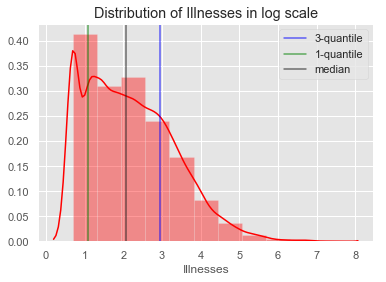

In [46]:
outbreaks["log_stand_Illnesses"]=np.log(outbreaks.Illnesses)
mean = outbreaks["log_stand_Illnesses"].mean()
std = outbreaks["log_stand_Illnesses"].std()
median = outbreaks["log_stand_Illnesses"].median()
quant_3 = np.percentile(outbreaks["log_stand_Illnesses"],75)
quant_1 = np.percentile(outbreaks["log_stand_Illnesses"],25)
plt.cla()
sns.distplot(np.log(outbreaks.Illnesses), bins=11, color='red',fit=None)
plt.title('Distribution of Illnesses in log scale')
plt.axvline(x=quant_3,label = "3-quantile",c="blue",alpha = 0.6)
plt.axvline(x=quant_1, label = "1-quantile",c="green",alpha = 0.6)
plt.axvline(x=median, label = "median",c="k",alpha = 0.6)
plt.legend()
display()

By using the median as threshold, let us transform the numerical  column Illnesses to a categorical one.

In [47]:

def A_lot_of_Ill(log_stand_Illnesses,median):
    out_A_lot_of_Ill = outbreaks[log_stand_Illnesses] >= median
    out_A_lot_of_Ill.astype("float")
    return out_A_lot_of_Ill

median = outbreaks["log_stand_Illnesses"].median()
outbreaks["A_lot_of_Ill"] = A_lot_of_Ill("log_stand_Illnesses",median)
outbreaks.head()

,Year,Month,State,Illnesses,Hospitalizations,Fatalities,Species,Location,Food,log_stand_Illnesses,A_lot_of_Ill
0,2009,January,MN,2.0,0.0,0.0,norovirus,rest-sit-down,"chicken, bbq",0.693147,False
1,2009,January,MN,16.0,0.0,0.0,norovirus,private home/residence,oysters,2.772589,True
2,2009,January,MN,5.0,0.0,0.0,norovirus,rest-sit-down,"fish, ahi",1.609438,False
3,2009,January,MN,3.0,0.0,0.0,norovirus,rest-fast-food,"chicken, nuggets/fingers",1.098612,False
4,2009,January,MN,21.0,0.0,0.0,norovirus,rest-other or unknown,cookies,3.044522,True


Statistics of hospitalizations.

median for hospitalizations 0.00


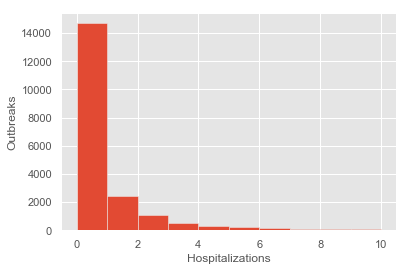

In [48]:
print("median for hospitalizations {:.2f}".format(np.percentile(outbreaks.Hospitalizations,50)))

plt.hist(outbreaks.Hospitalizations,bins = 10,range= [0.0,10] )
plt.xlabel("Hospitalizations")
plt.ylabel("Outbreaks")
plt.show()

In [49]:
print("Percent of outbreaks that not produce hospitalizations {:.1f} %".format(100.0*(outbreaks.Hospitalizations == 0.0).sum()/outbreaks.Hospitalizations.shape[0]))
print("Percent of outbreaks that produce hospitalizations {:.1f} %".format(100.0*(outbreaks.Hospitalizations > 0.0).sum()/outbreaks.Hospitalizations.shape[0]))

Percent of outbreaks that not produce hospitalizations 73.6 %
Percent of outbreaks that produce hospitalizations 26.4 %


Here we have a lot of cases with zero hospitalizations not many outbreaks with one or more hospitalizations(in fact they are at the rate of $75/25$)  that mimics a Pareto distribution. As most outbreaks do not generate hospitalizations, let us  divide the dataset in two categories: outbreaks with hospitalizations and outbreaks without them.

median for fatalities 0.00


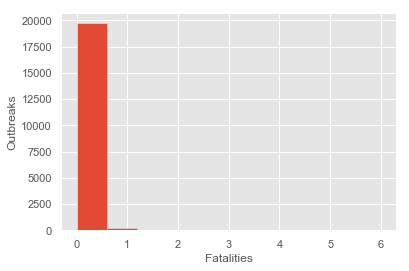

In [50]:
print("median for fatalities {:.2f}".format(np.percentile(outbreaks.Fatalities,50)))

plt.hist(outbreaks.Fatalities,bins = 10,range= [0.0,6] )
plt.xlabel("Fatalities")
plt.ylabel("Outbreaks")
plt.show()

In [51]:
print("Percent of outbreaks that not produce deaths {:.1f} %".format(100.0*(outbreaks.Fatalities == 0.0).sum()/outbreaks.Fatalities.shape[0]))
print("Percent of outbreaks that produce deaths {:.1f} %".format(100.0*(outbreaks.Fatalities > 0.0).sum()/outbreaks.Fatalities.shape[0]))

Percent of outbreaks that not produce deaths 98.8 %
Percent of outbreaks that produce deaths 1.2 %


Here we can see that the outbreaks with fatalities are very rare. The rate of deaths vs  not deaths is  $99/1$. So, essentially we have two classes: outbreaks with deaths and outbreaks without them.

In [52]:

def two_classes(data, column,thr=0.0):
    #not_null= dataframe[~dataframe[column].isnull()]
    #not_null_column= not_null[column]
    dataframe= data.copy()
    binary_classes= (dataframe[column] > thr).astype("float")
    return binary_classes

outbreaks["Are_there_Hospitalizations"] = two_classes(outbreaks, "Hospitalizations",thr=0.0)
outbreaks["Are_there_Fatalities"] = two_classes(outbreaks,"Fatalities",  0.0)
outbreaks.head()


,Year,Month,State,Illnesses,Hospitalizations,Fatalities,Species,Location,Food,log_stand_Illnesses,A_lot_of_Ill,Are_there_Hospitalizations,Are_there_Fatalities
0,2009,January,MN,2.0,0.0,0.0,norovirus,rest-sit-down,"chicken, bbq",0.693147,False,0.0,0.0
1,2009,January,MN,16.0,0.0,0.0,norovirus,private home/residence,oysters,2.772589,True,0.0,0.0
2,2009,January,MN,5.0,0.0,0.0,norovirus,rest-sit-down,"fish, ahi",1.609438,False,0.0,0.0
3,2009,January,MN,3.0,0.0,0.0,norovirus,rest-fast-food,"chicken, nuggets/fingers",1.098612,False,0.0,0.0
4,2009,January,MN,21.0,0.0,0.0,norovirus,rest-other or unknown,cookies,3.044522,True,0.0,0.0


Behaviour of outbreaks with the years. 

In [53]:
outbreaks_years = outbreaks[["Year","Illnesses"]]
# Pandas serie with number of outbreaks by year(serie index)
byyear= outbreaks_years.groupby("Year").Illnesses.count()
byyear_percent = round(100.0*byyear/byyear.sum(),2);



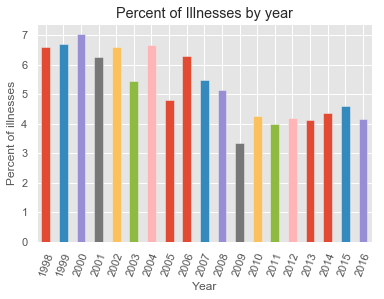

In [54]:
#Graph of number of Illnesses by year
byyear_percent.plot(kind ="bar",rot = 70,grid = True)
plt.title('Percent of Illnesses by year')
plt.ylabel('Percent of illnesses')
plt.show()

It seems that the number of outbreaks decreases with the course of the years.

In [55]:
#def not_null_column(dataframe,column):
#    return  dataframe[(~dataframe[column].isnull())]

def sort_by_frecuency(data,column):
    dataframe = data.copy()
    outbreaks_column = pd.pivot_table(dataframe, index=column, values='Illnesses', aggfunc='count')
    # Sorted number of outbreaks by state
    sorted_by_column= outbreaks_column.sort_values(by="Illnesses",axis=0, ascending=False)
    percent_outbreaks_by_column= 100.0*sorted_by_column/sorted_by_column['Illnesses'].sum()
    percent_outbreaks_by_column.columns = ["%_of_outbreaks"]
    return percent_outbreaks_by_column

    
def most_common(data, column,n_classes=10):
    dataframe = data.copy()
    top_classes=list(dataframe[column].value_counts().index)[:n_classes]
    def common_classes(element):
        # This fuction return the  n_classes classes that produced most of the outbreaks
        if element in top_classes:
            return element 
        else:
            return "bulk_" + column
    most_common_elements =dataframe[column].apply(common_classes)
    return most_common_elements


In [56]:
def classes_percent(dataframe,column,target, month=False):
    outbreaks_our_columns = dataframe[[column,target,'Illnesses']]
    outbreaks_each_class= pd.DataFrame(outbreaks_our_columns.
                                       groupby([column,target]).Illnesses.count())
    outbreaks_each_class.columns = ["Count"]
    if month:
        # Sort the results according to calendar 
        outbreaks_each_class_sorted=outbreaks_each_class.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'],level=0)
    else:
        outbreaks_each_class_sorted =outbreaks_each_class.copy()
    
    unstack_each_class= outbreaks_each_class_sorted.unstack().fillna(0.0)
    
    unstack_each_class.columns =["Class_zero","Class_non_zero"]
    #sorted_loc.sort_values(by="More_than_zero", ascending=0,inplace=True)
    unstack_each_class_percent=pd.DataFrame(round(100.0*unstack_each_class["Class_non_zero"]/unstack_each_class.sum(axis = 1),2),columns=["Class_non_zero"])
    unstack_each_class_percent.sort_values(by="Class_non_zero", ascending=0,inplace=True)
    return  unstack_each_class_percent 
    
    
    """outbreaks_each_class_sorted["Percent"] = 0.0
    for indx,lev in enumerate(outbreaks_each_class_sorted.index.levels[0]):
        outbreaks_each_class_sorted.loc[lev,:]['Percent'] \
        = round(100.0*outbreaks_each_class_sorted.loc[lev,:].Count
                                                /outbreaks_each_class_sorted.sum(level = outbreaks_each_class_sorted.index.names[0]).Count[indx],2)
    return #outbreaks_each_class #outbreaks_each_class_sorted"""
    
    
def baseline(target):
    return pd.DataFrame(100.0*outbreaks[target].value_counts()
                        /outbreaks[target].value_counts().sum()).loc[1.0,target]

In [57]:
features = ["Location", "Species","Food", "State"]
target = "Are_there_Hospitalizations"
print("Percent of outbreaks that cause hospitalization {}%"\
      .format(round(baseline(target),2)))

Percent of outbreaks that cause hospitalization 26.42%


In other words, If we randomly select an entry in our dataset, the probability that this observation causes hospitalizations is $26$%. This value is going to define our base model. If we know the location or the species would it  change this probability?

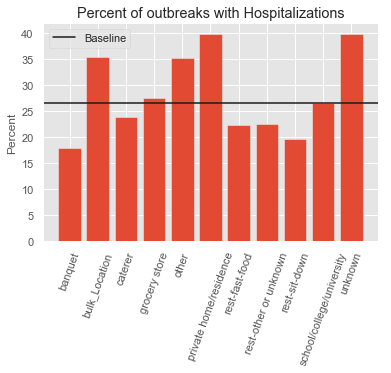

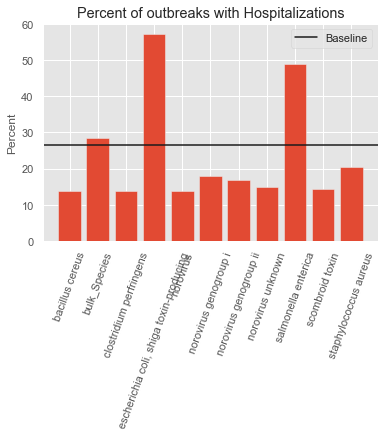

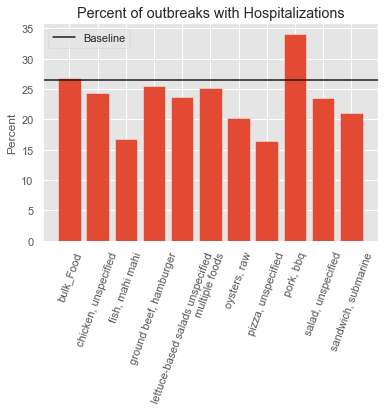

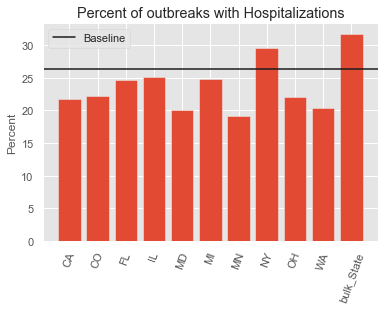

In [58]:
baseline = baseline(target)
for feature in features:
    outbreaks["Most_common_" +feature] = most_common(outbreaks, feature,n_classes=10)
    percent= classes_percent(outbreaks,"Most_common_" +feature,target, month=False)
    plt.axhline(y=baseline, color = 'k',label ="Baseline")
    plt.bar(percent.index, percent.Class_non_zero.values)
    plt.ylabel("Percent")
    plt.title("Percent of outbreaks with Hospitalizations")
    plt.legend()
    plt.xticks(rotation=70)
    plt.show()

As we can see, in general,  the features  Locations and Species are not too bad indicators that if a given  outbreak is going to have Hospitalizations or not.

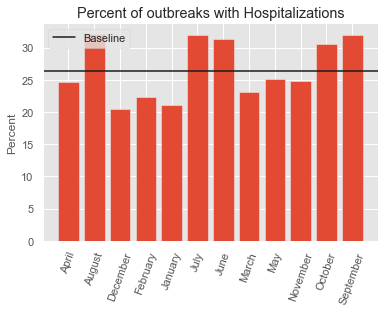

In [59]:
percent= classes_percent(outbreaks,'Month',target, month=True)
plt.axhline(y=baseline, color = 'k',label ="Baseline")
plt.bar(percent.index, percent.Class_non_zero.values)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()
plt.xticks(rotation=70)
plt.show()

It seems that knowing only the month in which the outbreak occurred is not useful in predicting whether there were hospitalizations(at less compared with other features). 

In [60]:
import seaborn as sns
def outliers_by_month(column):
    sns.catplot(x="Month", y=column,jitter=0.2,height=5.0, aspect=7/5.0,data=outbreaks)
    plt.xticks(rotation=70)
    plt.xlabel("Months")
    plt.ylabel(column)
    plt.axhline(y=np.percentile(outbreaks[column],99.9), linewidth=0.8, color = 'red',label = "99.9 percentile")
    plt.legend()
    


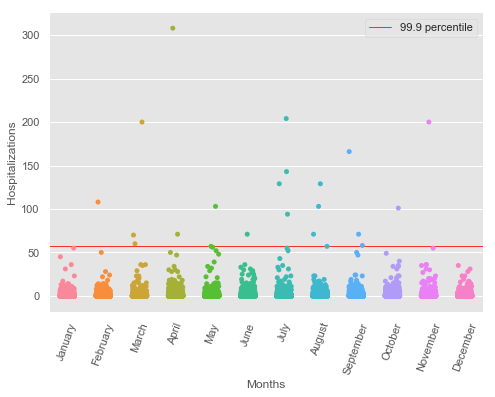

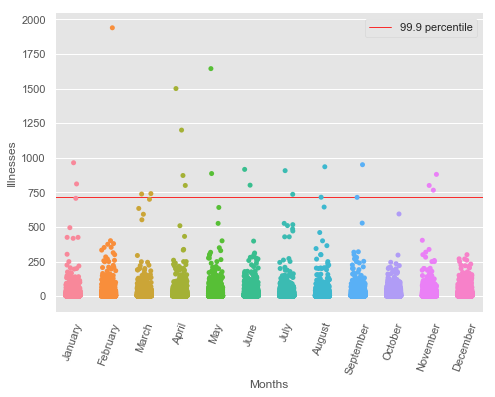

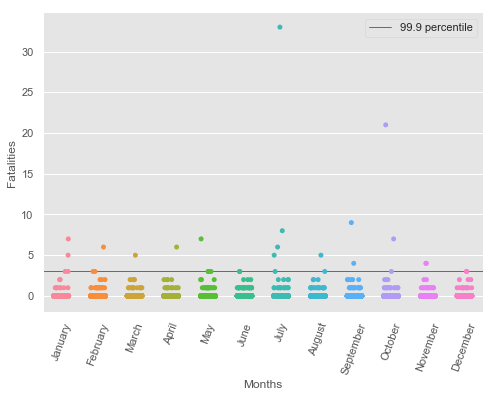

In [61]:
str_columns= ['Hospitalizations',"Illnesses","Fatalities"]
for column in str_columns:
    outliers_by_month(column)

Since our data is like-Pareto distributed the threshold that we would chose can not be too restrictive. Otherwise, we will lose valuable information in the class that describes the outbreaks that generate hospitalizations. Here we will consider a threshold of 99.9 % for 'Hospitalizations' and "Illnesses" and  about 99.95 % for "Fatalities".

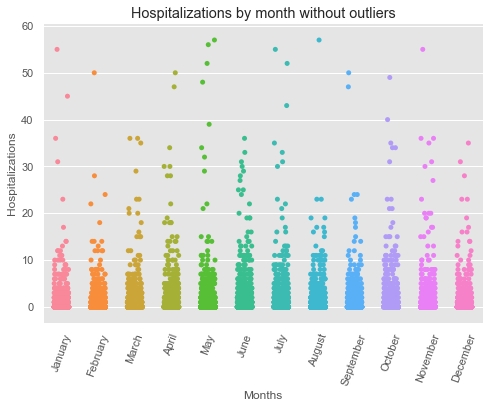

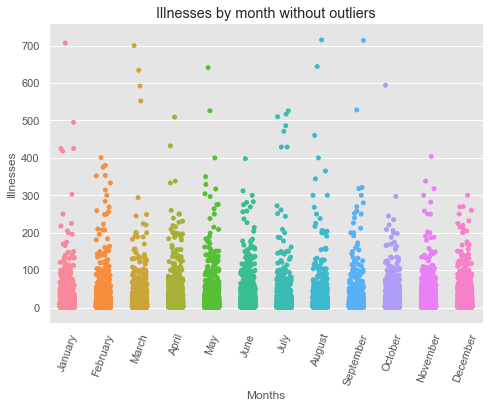

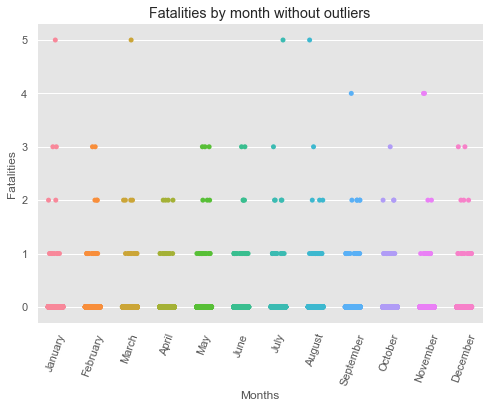

In [62]:

def without_outliers(column,threshold=99.9, fata_threshold=99.9):
    if column == "Fatalities":
        threshold = fata_threshold
        
    no_outliers=outbreaks[outbreaks[column] <np.percentile(outbreaks[column],threshold)]
    sns.catplot(x="Month", y=column,jitter=0.2,height=5.0, aspect=7/5.0,data=no_outliers);
    plt.xticks(rotation=70);
    plt.xlabel("Months");
    plt.ylabel(column);
    plt.title(column + " by month without outliers")
# Let us treat 'Hospitalizations' and "Illnesses" together
for column in str_columns[:2]:
    without_outliers(column,threshold=99.9)
# The threshold for  "Fatalities" is 99.5%
without_outliers("Fatalities",fata_threshold=99.95)

In [63]:
def not_outliers_column(data, train_data, column,threshold=99.9):
    if column == "Fatalities":
        thr = 99.95
    else:
        thr = threshold
        
    return (data[column] < np.percentile(train_data[column],thr))

features = ["Hospitalizations","Fatalities","Illnesses"]
not_outliers_outbreaks = outbreaks.copy()
for feature in features:
    without_outliers= not_outliers_column(not_outliers_outbreaks, not_outliers_outbreaks, feature,threshold=99.9)
    not_outliers_outbreaks= not_outliers_outbreaks.loc[without_outliers,:]
    
not_outliers_outbreaks

,Year,Month,State,Illnesses,Hospitalizations,Fatalities,Species,Location,Food,log_stand_Illnesses,A_lot_of_Ill,Are_there_Hospitalizations,Are_there_Fatalities,Most_common_Location,Most_common_Species,Most_common_Food,Most_common_State
0,2009,January,MN,2.0,0.0,0.0,norovirus,rest-sit-down,"chicken, bbq",0.693147,False,0.0,0.0,rest-sit-down,norovirus,bulk_Food,MN
1,2009,January,MN,16.0,0.0,0.0,norovirus,private home/residence,oysters,2.772589,True,0.0,0.0,private home/residence,norovirus,bulk_Food,MN
2,2009,January,MN,5.0,0.0,0.0,norovirus,rest-sit-down,"fish, ahi",1.609438,False,0.0,0.0,rest-sit-down,norovirus,bulk_Food,MN
3,2009,January,MN,3.0,0.0,0.0,norovirus,rest-fast-food,"chicken, nuggets/fingers",1.098612,False,0.0,0.0,rest-fast-food,norovirus,bulk_Food,MN
4,2009,January,MN,21.0,0.0,0.0,norovirus,rest-other or unknown,cookies,3.044522,True,0.0,0.0,rest-other or unknown,norovirus,bulk_Food,MN
5,2009,January,MN,7.0,0.0,0.0,norovirus,rest-other or unknown,"salad, unspecified",1.945910,False,0.0,0.0,rest-other or unknown,norovirus,"salad, unspecified",MN
6,2009,February,MN,5.0,0.0,0.0,norovirus,rest-other or unknown,house salad,1.609438,False,0.0,0.0,rest-other or unknown,norovirus,bulk_Food,MN
7,2009,February,MN,22.0,1.0,0.0,norovirus genogroup ii,rest-other or unknown,mushrooms; pasta salad; fruit,3.091042,True,1.0,0.0,rest-other or unknown,norovirus genogroup ii,bulk_Food,MN
8,2009,February,MN,16.0,0.0,0.0,norovirus,rest-other or unknown,vegetables,2.772589,True,0.0,0.0,rest-other or unknown,norovirus,bulk_Food,MN
9,2009,February,MN,11.0,2.0,0.0,campylobacter jejuni,rest-other or unknown,"lettuce, unspecified",2.397895,True,1.0,0.0,rest-other or unknown,bulk_Species,bulk_Food,MN


In [65]:
outbreaks= raw_outbreaks.copy()
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Data columns (total 9 columns):
Year                19984 non-null int64
Month               19984 non-null object
State               19984 non-null object
Illnesses           19984 non-null float64
Hospitalizations    16338 non-null float64
Fatalities          16372 non-null float64
Species             13195 non-null object
Location            18831 non-null object
Food                10499 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


Separation in train and test sets. The train set is going to be used to train and validate de model. The test set is going to be put aside until the end.

In [66]:
# In order tu use train_test_split we create and extra column filled with ones.
extra_column= np.ones(outbreaks.values.shape[0]).reshape(-1,1)
X = outbreaks.values

from sklearn.model_selection import train_test_split
# X_train_val is our train-validate set
X_train_val, X_test, _, _ = train_test_split(X, extra_column,test_size \
                                                    = 0.25, random_state=3)
# outbreaks_train associated dataframe of X_train_val
outbreaks_train = pd.DataFrame(X_train_val, columns=outbreaks.columns) 
# outbreaks_test associated dataframe of X_test
outbreaks_test = pd.DataFrame(X_test, columns=outbreaks.columns ) 

In [67]:
# scikit-learn k-fold cross-validation
from numpy import array
from random import seed
np.random.seed(12)
from sklearn.model_selection import KFold
# data 
data = X_train_val
# Prepare cross validation and number of splits
n_folds = 3
kfold = KFold(n_folds, shuffle=False, random_state=132)
# pairs of train and validation sets to do cv
data_splits=kfold.split(data)
train_sets= [] # n_folds train  sets
val_sets = [] # n_folds validation  sets
for train_index, val_index in data_splits:
    train_sets.append(data[train_index])
    val_sets.append(data[val_index])
    


To avoid data leaking fron validation set to trainig set, we will do all preprocessing steps in each cv fold.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import (BernoulliNB,GaussianNB,MultinomialNB)
from xgboost import XGBClassifier

#
#check_train=[]
#check_val=[]
X_train_sets= [] # List that will contain n_folds  clean  train sets 
X_val_sets= [] # List that will contain n_folds  clean  train sets 
y_train_sets= []
y_val_sets= []
for index in range(n_folds):
    # Steps in each fold
    train = None
    val = None
    y_train = None
    X_train = None
    y_val = None
    X_val = None
    # Train and val sets for this fold
    train = train_sets[index]
    val = val_sets[index]
    # Train and validation dataframes for this fold 
    train = pd.DataFrame(train, columns=outbreaks_train.columns )    
    val = pd.DataFrame(val, columns=outbreaks_train.columns )
    
    # Formating the numerical features
    def to_float(dataframe,column):
        data= dataframe.copy()
        return data[column].astype("float")

    float_columns= ['Illnesses', 'Hospitalizations', 'Fatalities']

    for column in float_columns: 
        train.loc[:,column]= to_float(train,column)
        val.loc[:,column]= to_float(val,column)

  

      
    # Logarithmic scale for Illenesses
    train["Log_Illnesses"]=np.log(train.Illnesses)
    val["Log_Illnesses"]=np.log(val.Illnesses)
    
    # Median for the train set
    global median_Log_Ill_train
    median_Log_Ill_train=train["Log_Illnesses"].median()

    def A_lot_of_Ill(column):
        """To evoid data leaking the criteria that define 
        the clases is calculated only in the train set"""
        
        out_A_lot_of_Ill = column >= median_Log_Ill_train
        out_A_lot_of_Ill = out_A_lot_of_Ill.astype("int")
        return out_A_lot_of_Ill
    """New columns, two classes: one class describes the outbreaks 
    with less Illnesses than the median  and the another class 
    outbreaks with more Illnesses than the median"""
    
    train["A_lot_of_Ill"] = A_lot_of_Ill( train["Log_Illnesses"] )
    val["A_lot_of_Ill"] = A_lot_of_Ill(val["Log_Illnesses"])
    
    
    # Filling null entries with  values generated randomly from the not null entries.  
    def fill_nulls(data,rand_values,column):
        
          """
        Let us make a copy of our dataframe to be sure not to change it 
        while we manipulate and do assignations. 
        """
            
        dataframe = data.copy()
        new_column= dataframe[column].fillna(value= rand_values,inplace= False)
        return new_column
    
    # Filling null values for each column using only train set
    for column in train.columns:
        if train[column].isnull().sum()> 0.0:
            rand_values_train=pd.Series(np.random.choice(train[~train[column].isnull()][column]\
                                       ,size=train[column].shape[0]))
            train.loc[:,column]= fill_nulls(train,rand_values_train,column)
        if val[column].isnull().sum()> 0.0:
            # The values used to fill the validation set come from the train set
            rand_values_val=pd.Series(np.random.choice(train[~train[column].isnull()][column]\
                                       ,size=train[column].shape[0]))
            val.loc[:,column]= fill_nulls(val,rand_values_val,column)
       


    #Checkpoint

    # Function that produces two classes given a threshold
    def two_classes(data, column,thr=0.0):
        #not_null= dataframe[~dataframe[column].isnull()]
        #not_null_column= not_null[column]
        dataframe= data.copy()
        binary_classes= (dataframe[column] > thr).astype("float")
        return binary_classes
    
    #Passing Hospitalizations and Fatalities to categorical variables.
    train["Are_there_Hospitalizations"] = two_classes(train, "Hospitalizations",thr=0.0)
    val["Are_there_Hospitalizations"] = two_classes(val, "Hospitalizations",thr=0.0)
    # New columns 
    train["Are_there_Fatalities"] = two_classes(train,"Fatalities",  0.0)
    val["Are_there_Fatalities"] = two_classes(val,"Fatalities",  0.0)

    
    
    # Most common  elements for  the features 'Species', 'Location' and  'Food'
    def most_common(data, column,top_classes):
        dataframe = data.copy()
        def common_classes(element):
            # This fuction return the most common classes 
            if element in top_classes:
                return element 
            else:
                return "bulk_" + column
        most_common_elements =dataframe[column].apply(common_classes)
        return most_common_elements

    categorical_cols = ['Species', 'Location']
    n_classes = 30
    # New columns with the most common entries
    for feature in categorical_cols:
        # Most common elements are generated in the train set
        top=list(train[feature].value_counts().index)[:n_classes]
        train["Most_common_" + feature] = most_common(train,feature,top_classes=top)
        val["Most_common_" + feature] = most_common(val,feature,top_classes=top)
        top = None

    # Outliers 
    
    def not_outliers_column(data, train_set, column,threshold=99.9):
        if column == "Fatalities":
            thr = 99.95
        else:
            thr = threshold
        train_data=train_set.copy()
        return (data[column] <= np.percentile(train_data[column],thr))
    
    features = ["Hospitalizations","Fatalities","Illnesses"]
    not_outliers_train = train.copy()
    not_outliers_val = val.copy()
    #print(not_outliers_val.info())
    for feature in features:
        without_outliers_train= not_outliers_column(not_outliers_train, train
                                              , feature,threshold=99.9)
        without_outliers_val= not_outliers_column(not_outliers_val, train
                                              , feature,threshold=99.9)
        temp_not_outliers_train= not_outliers_train.loc[without_outliers_train,:]
        temp_not_outliers_val= not_outliers_val.loc[without_outliers_val,:]
        not_outliers_train = None
        not_outliers_val = None
        not_outliers_train = temp_not_outliers_train.loc[:,:]
        not_outliers_val = temp_not_outliers_val.loc[:,:]
        temp_not_outliers_train = None
        temp_not_outliers_val = None
        

    
    #Checkpoint    
    #  Clean train and validation set
    outbreaks_clasif_train=not_outliers_train[['Year', 'Month', 'State','A_lot_of_Ill', 'Are_there_Hospitalizations',
                                               'Species', 'Location']]
    outbreaks_clasif_val=not_outliers_val[['Year', 'Month', 'State','A_lot_of_Ill', 'Are_there_Hospitalizations',
                                               'Species', 'Location']]
    
    
    """outbreaks_clasif_train=not_outliers_train[['Year', 'Month', 'State','A_lot_of_Ill', 'Are_there_Hospitalizations', 'Are_there_Fatalities',
                                               'Most_common_Species', 'Most_common_Location']]
    outbreaks_clasif_val=not_outliers_val[['Year', 'Month', 'State','A_lot_of_Ill', 'Are_there_Hospitalizations', 'Are_there_Fatalities',
                                               'Most_common_Species', 'Most_common_Location']]
    
    """
    # pd.get_dummies need that all data have to be in the same dataframe
    
    # Encoding categorical variables using get_dummies
    def get_dummies(data1,data2):
        dframe1= data1.copy()
        dframe2= data2.copy()
        join=pd.concat([dframe1,dframe2],axis = 0) # concatenating train and val sets
        join_reindex= join.reset_index(drop=True,inplace=False)
        dummies= pd.get_dummies(join_reindex,drop_first=True)
        df1_dummies= dummies.iloc[:dframe1.shape[0],:]
        df2_dummies = dummies.iloc[dframe1.shape[0]:,:].reset_index(drop=True,inplace=False)
        return df1_dummies, df2_dummies

    """outbreaks_clasif_train.reset_index(inplace = True) 
    outbreaks_clasif_val.reset_index(inplace = True) 
    

    join_data= pd.concat([outbreaks_clasif_train, outbreaks_clasif_val],ignore_index=True)
    
    outbreaks_dummies =pd.get_dummies(join_data,drop_first=True)
    outbreaks_dummies_train= outbreaks_dummies.iloc[:outbreaks_clasif_train.index[-1]+1,:]
    outbreaks_dummies_val = outbreaks_dummies.iloc[outbreaks_clasif_train.index[-1]+1:,:]
    """
    
    outbreaks_dummies_train= get_dummies(outbreaks_clasif_train,outbreaks_clasif_val)[0]
    outbreaks_dummies_val = get_dummies(outbreaks_clasif_train,outbreaks_clasif_val)[1]
    
    # Separating predictors from the response variable for train and val sets
    y_train = outbreaks_dummies_train['Are_there_Hospitalizations'].values.reshape(-1,1).ravel()
    X_train = outbreaks_dummies_train.drop('Are_there_Hospitalizations', axis=1).values
    y_val = outbreaks_dummies_val['Are_there_Hospitalizations'].values.reshape(-1,1).ravel()
    X_val = outbreaks_dummies_val.drop('Are_there_Hospitalizations', axis=1).values
    
  
    #Clean and  set data. n_folds pairs of train and val sets
    X_train_sets.append(X_train)
    y_train_sets.append(y_train)
    X_val_sets.append(X_val)
    y_val_sets.append(y_val)

In [309]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RepeatedEditedNearestNeighbours,TomekLinks,AllKNN,NeighbourhoodCleaningRule,OneSidedSelection
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from itertools import product
    
def classifier(method,parameters):
    return method(**parameters)


# This function takes a dictionary of hyperparameters  and 
#return all posible combination of them 
def param_grid(dict_parameters):
    hyperparameter_combinations=[]
    params =[]
    param_names =[]
    for key,value in dict_parameters.items():
        param_names.append(key)
        params.append(value)
    combination_params = list(product(*params))# All combinations
    for combination in combination_params:
        hyperparameter= dict(zip(param_names,combination))
        hyperparameter_combinations.append(hyperparameter)
    return hyperparameter_combinations





def metrics(y,y_pred):
    classif_report= classification_report(y, y_pred,digits=5)
    """
    Extract all float values. The first 4 elements are associated to class 0
    and the labels are as follow: class, presition, recall , f1_score
    For class1 is the same. 
    The last 3 element are the average
    
    """
    metrics_classes = re.findall("\d+\.\d+",classif_report)
    class0_str= metrics_classes[:4] # class0, class, pres, recal, f1_score
    class1_str = metrics_classes[4:8] # class 1
    avg_str = metrics_classes[8:]# average
    class0= list(map(lambda x: float(x),class0_str))# string to float
    class1= list(map(lambda x: float(x),class1_str))
    avg=list(map(lambda x: float(x),avg_str))
    return class0,class1,avg

# Grid search

def sampling(X_set,y_set, balanced=False):
    X_data, y_data = X_set.copy(),y_set.copy()
    x_res, y_res = None,None
    sm = SMOTEENN(ratio = "auto")
        
    if balanced== True:
        #Sampling and balancing the train data
        x_res, y_res = sm.fit_sample(X_data, y_data)
    else:
        x_res, y_res= X_data, y_data
    return x_res, y_res, 100.0*y_res.sum()/y_res.shape[0]

       
def scores_grid(method=BernoulliNB, dict_parameters={'alpha': [1]}):
    class0_metrics =[]
    class1_metrics=[]
    
    #parameters = []
    for param_set in param_grid(dict_parameters):
        #parameters.append(param_set)
        clf= classifier(method,param_set)
        
        sum_scores_recall_train_c1, sum_scores_recall_val_c1= (0,0)
        sum_scores_f1_train_c1, sum_scores_f1_val_c1= (0,0)
        
        sum_scores_recall_train_c0, sum_scores_recall_val_c0= (0,0)
        sum_scores_f1_train_c0, sum_scores_f1_val_c0= (0,0)
        
        for fold in range(n_folds):
            
            X_train, y_train, X_val, y_val =None,None,None,None
            y_pred_train,y_pred_val,val_scores,train_scores = None,None,None,None
            
            X_train, y_train = X_train_sampled[fold], y_train_sampled[fold]
            X_val, y_val= X_val_sets[fold], y_val_sets[fold]
                
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train_sets[fold])
            y_pred_val = clf.predict(X_val)
            
            val_scores = metrics(y_val,y_pred_val)
            train_scores = metrics(y_train_sets[fold],y_pred_train)
            ################## class 1
            #recall
            sum_scores_recall_val_c1 +=  val_scores[1][2] 
            sum_scores_recall_train_c1 +=  train_scores[1][2]
            
            #f1
            sum_scores_f1_val_c1 +=val_scores[1][3]
            sum_scores_f1_train_c1 +=train_scores[1][3]
            
            ################# class 0
            #Recall
            sum_scores_recall_val_c0 +=  val_scores[0][2]
            sum_scores_recall_train_c0 +=  train_scores[0][2]
            #f1
            sum_scores_f1_train_c0 +=train_scores[0][3]
            sum_scores_f1_val_c0 +=val_scores[0][3]
            
        
        #Class0
        
        #Recall
        recall_val_c0 = 100.0*sum_scores_recall_val_c0/n_folds
        recall_train_c0 = 100.0*sum_scores_recall_train_c0/n_folds
        #f1
        f1_val_c0 = 100.0*sum_scores_f1_val_c0/n_folds
        f1_train_c0 = 100.0*sum_scores_f1_train_c0/n_folds
        
        class0_metrics.append([recall_train_c0,recall_val_c0,\
                               f1_train_c0,f1_val_c0,param_set])
        
        
        
        #Class1
        #Recall
        recall_val_c1 = 100.0*sum_scores_recall_val_c1/n_folds
        recall_train_c1 = 100.0*sum_scores_recall_train_c1/n_folds
        #f1
        f1_val_c1 = 100.0*sum_scores_f1_val_c1/n_folds
        f1_train_c1 = 100.0*sum_scores_f1_train_c1/n_folds
        
        class1_metrics.append([recall_train_c1,recall_val_c1,\
                                f1_train_c1,f1_val_c1,param_set])
        
        
        
        
    return np.array(class0_metrics), np.array(class1_metrics)



def metrics_dataframe(metrics_class):
    # Dataframe with the metrics values 
    metrics_df=pd.DataFrame(metrics_class[:,:-1],\
                            columns=["recall_train","recall_val","f1_train","f1_val"])
    # Parameters values
    param_dicts=metrics_class[:,-1]
    # Dataframe  of parameters
    parameters_df= pd.DataFrame.from_dict(list(param_dicts))
    return pd.concat([parameters_df,metrics_df],axis=1)



def plot_metric_behaviour(dataframe,var_param,metric,fixed_param=None,step=3):
    df_metrics = dataframe.copy()
    # Plots of var_param vs metric for different values of fixed_param
    if fixed_param != None:
        for fixed_p in df_metrics[fixed_param].unique()[::step]:
            temp_fixed_p = None
            temp_fixed_p= df_metrics[df_metrics[fixed_param]==fixed_p]
            label=  fixed_param  + "_ " + str(fixed_p)
            plt.plot(temp_fixed_p[var_param],temp_fixed_p[metric],label=label)
        
        
    else:
        
        plt.plot(df_metrics[var_param],df_metrics[metric],label=var_param)
        
    plt.xlabel(var_param)
    plt.ylabel(metric + " (%)")
    plt.title(metric)
    plt.legend()
    plt.show()
    

def plot_learning_curve(dataframe,var_param, metric,fixed_param=None,value=None):
    df_metrics = dataframe.copy()
    #temp_fixed_p = None
    if value != None:
        temp_fixed_p= df_metrics[df_metrics[fixed_param]==value]
        title= metric + " with " + fixed_param + " = " + str(value)
        # Train metric
        plt.plot(temp_fixed_p[var_param],temp_fixed_p[metric +"_train" ],label="train")
        # Validation metric
        plt.plot(temp_fixed_p[var_param],temp_fixed_p[metric +"_val" ],label="val")

    else:
        title= metric 
        # Train metric
        plt.plot(df_metrics[var_param],df_metrics[metric +"_train" ],label="train")
        # Validation metric
        plt.plot(df_metrics[var_param],df_metrics[metric +"_val" ],label="val")

        
        
    plt.xlabel(var_param)
    plt.ylabel(metric + " (%)")
    plt.title(title)
    plt.legend()
    plt.show()
        
        

In [70]:
np.random.seed(123)
global X_train_sampled
global y_train_sampled
# Sampled train sets 
X_train_sampled, y_train_sampled =[],[]
ratio_list = []
np.random.seed(123)
for fold in range(n_folds):
    X_temp,y_temp=None,None
    X_temp,y_temp,ratio=sampling(X_train_sets[fold],y_train_sets[fold], balanced=True)
    X_train_sampled.append(X_temp)
    y_train_sampled.append(y_temp)
    ratio_list.append(ratio)

Random forest

In [71]:
n_estimators =list(map(np.int, np.logspace(1,2.3,15)))
max_depth =list(map(np.int, np.linspace(8,40,15)))
rf= scores_grid(RandomForestClassifier,{'n_estimators':n_estimators ,'max_depth': max_depth})

In [199]:
rf_metrics= metrics_dataframe(rf[0])
rf_metrics.head()

,max_depth,n_estimators,recall_val,f1_val,recall_train,f1_train
0,8,10,95.7457,43.0743,97.4137,44.251
1,10,10,92.97,44.49,95.5163,46.1567
2,12,10,90.176,45.182,94.153,47.8117
3,14,10,85.6407,46.858,91.2647,50.4407
4,17,10,81.941,47.5057,90.2317,52.972


How metrics change with the parameters 

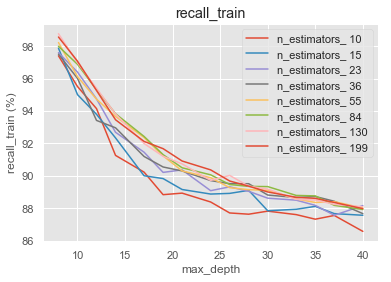

In [313]:
plot_metric_behaviour(rf_metrics,"max_depth", "recall_train","n_estimators",2)

Learning curves

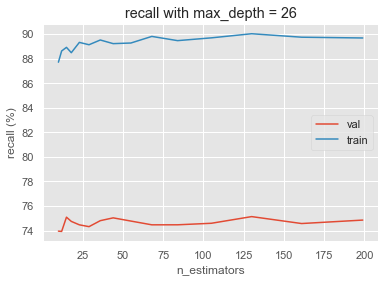

In [280]:
plot_learning_curve(rf_metrics,"n_estimators", "recall","max_depth",26)

Naive Bayes

In [293]:
params= np.linspace(0.01,1.0,10)
ber= scores_grid(BernoulliNB,{"alpha":params})


In [294]:
ber_metrics= metrics_dataframe(ber[0])
ber_metrics.head()

,alpha,recall_train,recall_val,f1_train,f1_val
0,0.01,55.791,55.128,68.013,67.1627
1,0.12,55.687,55.047,67.9253,67.119
2,0.23,55.5783,54.902,67.8527,67.0173
3,0.34,55.456,54.7843,67.76,66.9257
4,0.45,55.424,54.7033,67.7397,66.8777


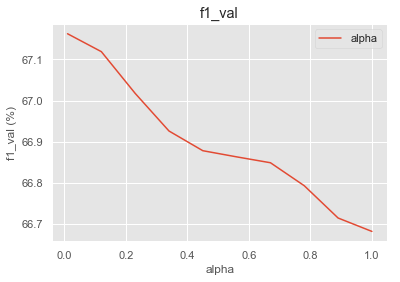

In [301]:
plot_metric_behaviour(ber_metrics, "alpha", "f1_val",None,2)

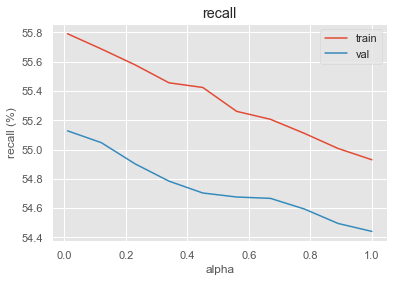

In [310]:
plot_learning_curve(ber_metrics,"alpha", "recall",None,None)

In [324]:
Cs= np.linspace(0.1,10.0,20)

plty= ["l1","l2"]
lreg= scores_grid(LogisticRegression,{"penalty":plty,"C":Cs})

In [325]:
lreg_metrics= metrics_dataframe(lreg[0])
lreg_metrics

,C,penalty,recall_train,recall_val,f1_train,f1_val
0,0.100000,l1,41.2457,40.846,56.3603,55.823
1,0.621053,l1,45.8857,44.9537,60.6337,59.492
2,1.142105,l1,46.8647,45.885,61.47,60.273
3,1.663158,l1,47.327,46.3557,61.872,60.656
4,2.184211,l1,47.8163,46.636,62.2777,60.868
5,2.705263,l1,47.975,46.772,62.4073,60.965
6,3.226316,l1,48.0023,46.9167,62.4243,61.071
7,3.747368,l1,48.0797,46.989,62.495,61.13
8,4.268421,l1,48.1473,47.0613,62.5557,61.1883
9,4.789474,l1,48.2287,47.1427,62.6213,61.2617


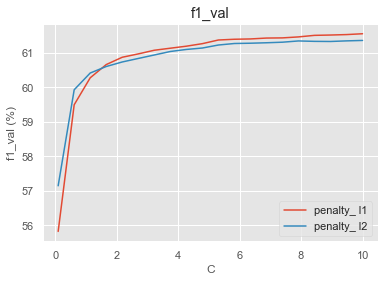

In [330]:
plot_metric_behaviour(lreg_metrics,"C", "f1_val","penalty",1)

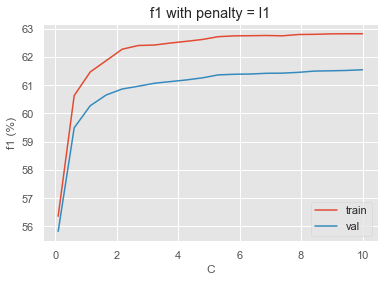

In [328]:
plot_learning_curve(lreg_metrics,"C", "f1","penalty","l1")

In [331]:
from sklearn import svm

In [388]:
Cs= np.linspace(0.5,1.0,2)
#'linear',
krnl=['linear']#"rbf"]
sv= scores_grid(svm.SVC,{"kernel":krnl,"C":Cs})

In [ ]:
sv_metrics= metrics_dataframe(sv[0])
sv_metrics

In [ ]:
plot_metric_behaviour(sv_metrics,"C", "f1_val","kernel",1)

In [ ]:
plot_learning_curve(sv_metrics,"C", "f1","kernel",'linear')

In [336]:
test_set = outbreaks_test.copy()
train_set = outbreaks_train.copy()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 9 columns):
Year                14988 non-null object
Month               14988 non-null object
State               14988 non-null object
Illnesses           14988 non-null object
Hospitalizations    12247 non-null object
Fatalities          12260 non-null object
Species             9923 non-null object
Location            14121 non-null object
Food                7895 non-null object
dtypes: object(9)
memory usage: 1.0+ MB


In [337]:
del test_set["Food"]
del train_set["Food"]
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 8 columns):
Year                4996 non-null object
Month               4996 non-null object
State               4996 non-null object
Illnesses           4996 non-null object
Hospitalizations    4091 non-null object
Fatalities          4112 non-null object
Species             3272 non-null object
Location            4710 non-null object
dtypes: object(8)
memory usage: 312.3+ KB


In [338]:
for column in train_set.columns:
    if train_set[column].isnull().sum()> 0.0:
        rand_values=pd.Series(np.random.choice(train_set[~train_set[column].isnull()][column]\
                                       ,size=train_set[column].shape[0]))
        train_set.loc[:,column]= fill_nulls(train_set,rand_values,column)
        

In [344]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 8 columns):
Year                14988 non-null object
Month               14988 non-null object
State               14988 non-null object
Illnesses           14988 non-null object
Hospitalizations    14988 non-null float64
Fatalities          14988 non-null float64
Species             14988 non-null object
Location            14988 non-null object
dtypes: float64(2), object(6)
memory usage: 936.8+ KB


In [345]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 8 columns):
Year                4996 non-null object
Month               4996 non-null object
State               4996 non-null object
Illnesses           4996 non-null object
Hospitalizations    4091 non-null object
Fatalities          4112 non-null object
Species             3272 non-null object
Location            4710 non-null object
dtypes: object(8)
memory usage: 312.3+ KB


In [346]:
test_set.dropna(inplace=True)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4994
Data columns (total 8 columns):
Year                2628 non-null object
Month               2628 non-null object
State               2628 non-null object
Illnesses           2628 non-null object
Hospitalizations    2628 non-null object
Fatalities          2628 non-null object
Species             2628 non-null object
Location            2628 non-null object
dtypes: object(8)
memory usage: 184.8+ KB


In [ ]:
"""for column in test_set.columns:
    if test_set[column].isnull().sum()> 0.0:
        rand_values=pd.Series(np.random.choice(test_set[~test_set[column].isnull()][column]\
                                       ,size=test_set[column].shape[0]))
        test_set.loc[:,column]= fill_nulls(test_set,rand_values,column)"""

In [347]:
       
numeric_cols= ['Illnesses', 'Hospitalizations', 'Fatalities']

for column in numeric_cols:
    train_set.loc[:,column]=train_set[column].astype("float64",copy=False)
    test_set.loc[:,column]=test_set[column].astype("float64",copy=False)
test_set.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4994
Data columns (total 8 columns):
Year                2628 non-null object
Month               2628 non-null object
State               2628 non-null object
Illnesses           2628 non-null float64
Hospitalizations    2628 non-null float64
Fatalities          2628 non-null float64
Species             2628 non-null object
Location            2628 non-null object
dtypes: float64(3), object(5)
memory usage: 184.8+ KB


In [348]:
train_set["Log_Illnesses"]=np.log(train_set.Illnesses)
test_set["Log_Illnesses"]=np.log(test_set.Illnesses)
median_Log_Ill_train=train_set["Log_Illnesses"].median()
median_Log_Ill_test=test_set["Log_Illnesses"].median()
def A_lot_of_Ill(column,median_Log):
    out_A_lot_of_Ill = column >= median_Log
    out_A_lot_of_Ill = out_A_lot_of_Ill.astype("int")
    return out_A_lot_of_Ill
train_set["A_lot_of_Ill"] = A_lot_of_Ill( train_set["Log_Illnesses"],median_Log_Ill_train)
test_set["A_lot_of_Ill"] = A_lot_of_Ill( test_set["Log_Illnesses"],median_Log_Ill_test)

In [349]:
train_set.drop(columns=["Log_Illnesses"],inplace=True)
test_set.drop(columns=["Log_Illnesses"],inplace=True)
train_set.drop(columns=["Illnesses"],inplace=True)
test_set.drop(columns=["Illnesses"],inplace=True)


In [350]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4994
Data columns (total 8 columns):
Year                2628 non-null object
Month               2628 non-null object
State               2628 non-null object
Hospitalizations    2628 non-null float64
Fatalities          2628 non-null float64
Species             2628 non-null object
Location            2628 non-null object
A_lot_of_Ill        2628 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 184.8+ KB


In [351]:
#Passing Hospitalizations and Fatalities to categoricals variables.
train_set["Are_there_Hospitalizations"] = two_classes(train_set,\
                                                      "Hospitalizations",thr=0.0).astype("int")
test_set["Are_there_Hospitalizations"] = two_classes(test_set, "Hospitalizations",thr=0.0).astype("int")
# New columns 
train_set["Are_there_Fatalities"] = two_classes(train_set,"Fatalities",  0.0).astype("int")
test_set["Are_there_Fatalities"] = two_classes(test_set,"Fatalities",  0.0).astype("int")

train_set.drop(columns=["Hospitalizations"],inplace=True)
test_set.drop(columns=["Hospitalizations"],inplace=True)
train_set.drop(columns=["Fatalities"],inplace=True)
test_set.drop(columns=["Fatalities"],inplace=True)
    

In [352]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 4994
Data columns (total 8 columns):
Year                          2628 non-null object
Month                         2628 non-null object
State                         2628 non-null object
Species                       2628 non-null object
Location                      2628 non-null object
A_lot_of_Ill                  2628 non-null int64
Are_there_Hospitalizations    2628 non-null int64
Are_there_Fatalities          2628 non-null int64
dtypes: int64(3), object(5)
memory usage: 184.8+ KB


In [353]:
dummies_train_set= get_dummies(train_set,test_set)[0]
dummies_test_set= get_dummies(train_set,test_set)[1]
    
# Separating predictors from the response variables for train and val sets
y_tr = dummies_train_set['Are_there_Hospitalizations'].values.reshape(-1,1).ravel()
X_tr = dummies_train_set.drop('Are_there_Hospitalizations', axis=1).values
y_tst = dummies_test_set['Are_there_Hospitalizations'].values.reshape(-1,1).ravel()
X_tst =dummies_test_set.drop('Are_there_Hospitalizations', axis=1).values


In [354]:



sm = SMOTEENN(random_state=123, ratio = "auto")
x_train_sm, y_train_sm = sm.fit_sample(X_tr, y_tr)




In [383]:
reg= RandomForestClassifier(n_estimators=10 ,max_depth=40) 
#LogisticRegression(C=0.8,penalty='l2')
#reg.fit(x_train_sm, y_train_sm)
reg.fit(x_train_sm, y_train_sm)
# Predict the labels of the test set: y_pred
y_pred = reg.predict(X_tst)

    # Compute and print metrics
#print("Accuracy: {}".format(reg.score(X_tst, y_tst)))
    #print(classification_report(y_test, y_pred))
    #print("Tuned Model Parameters: {}".format(s.best_params_))
    #print(confusion_matrix(y_tst, y_pred)
print(classification_report(y_tst, y_pred,digits=2))



             precision    recall  f1-score   support

          0       0.85      0.66      0.75      1806
          1       0.50      0.75      0.60       822

avg / total       0.74      0.69      0.70      2628



In [386]:
"""from imblearn.over_sampling import SMOTE  # or: import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

# Generate some data with an 8-to-2 class imbalance.


X_train, X_test, y_train, y_test = train_test_split(training_features, training_target.ravel(), test_size=0.33, random_state=444);

# This doesn't work with sklearn.pipeline.Pipeline because
# RandomOverSampler doesn't have a .tranform() method.
# (It has .fit_sample() or .sample().
pipe = imbPipeline([
    ('oversample', SMOTE(random_state=12, ratio = "auto")),\
    ('clf', LogisticRegression())]);

pipe = imbPipeline([
    ('oversample', SMOTE(random_state=444,ratio = 0.4)),
    ('clf', XGBClassifier(objective='binary:logistic',subsample=1,colsample_bytree=0.8,seed=123))
    ]) 

max_depth=list(range(2,20,2))
learning_rate=[0.01,0.1,0.5,1.0,2.0,3.0,5.0,8.0,10.0]
n_estimators=list(range(2,20))
#colsample_bytree=[0.01,0.05,0.1,0.3,0.6,0.8,0.9]
cs= [0.01,0.05,0.1,0.5,1.0,5.0,10.0,20.0]
param_grid = {'clf__C': cs, 'clf__penalty': ['l1', 'l2']}
#param_grid = {'clf__alpha':[0.001,0.05,0.1,0.2,0.3,0.5,0.7,0.8,1.0] }
#param_grid = {'clf__max_depth' : max_depth,"clf__learning_rate":learning_rate,"clf__n_estimators": n_estimators}
skf = 5 #StratifiedKFold()
#param_grid = {'clf__max_depth': [25, 40],'clf__max_features': ['sqrt', 'log2']}

grid = GridSearchCV(pipe, param_grid, return_train_score=False,\
                    verbose=False, scoring="recall", cv=5);
grid.fit(X_train, y_train);

print(grid.best_params_)
print("")
print("Scores for training data")
y_pred_train = grid.predict(training_features_org)
print(classification_report(training_target_org, y_pred_train))
print("Scores for test data")
y_pred = grid.predict(test_features_org)
print(classification_report(test_target_org, y_pred))

print(grid.score(X_test, y_test))
""";
